## 인구 공공데이터 살펴보기


* 혹시 한글이 깨져보인다면?
    - 파일 -> 다른 이름으로 저장 -> 파일 인코딩을 UTF-8로 바꾸고, 파일 형식을 모든 파일로 바꿔 저장
    

* 헤더 살펴보기

In [ ]:
import csv

f = open('incheon_population.csv', 'r')
data = csv.reader(f)
header = next(data)
print(header)


# 결과 예시

# ['행정구역', '2021년08월_남_총인구수', '2021년08월_남_연령구간인구수', '2021년08월_남_0세', '2021년08월_남_1세', 
# '2021년08월_남_2세', '2021년08월_남_3세', '2021년08월_남_4세', '2021년08월_남_5세', '2021년08월_남_6세', '2021년08월_남_7세', '
# 2021년08월_남_8세', '2021년08월_남_9세', '2021년08월_남_10세', '2021년08월_남_11세', '2021년08월_남_12세', '2021년08월_남_13세', '
# 2021년08월_남_14세', '2021년08월_남_15세', '2021년08월_남_16세', '2021년08월_남_17세', '2021년08월_남_18세', '2021년08월_남_19세',
# ...

* 위의 리스트에서


    - '2021년08월_남_0세'의 index는? 3
    - '2021년08월_남_1세'의 index는? 4
    - '2021년08월_남_100세 이상'의 index는? 103
    
    - '2021년08월_여_0세'의 index는? 106
    - '2021년08월_여_1세'의 index는? 107
    - '2021년08월_여_100세 이상'의 index는? 206
    
* 우리의 관심사는 남성(3 ~ 103), 여성(106 ~ 206)

## 우리 동네 인구 구조 시각화 절차

1. 인구 데이터 파일을 읽어온다.


2. 전체 데이터에서 한 줄씩 반복해서 읽어온다.


3. 시각화 대상 데이터를 선별한다.


4. 0세부터 100세 이상까지의 인구수를 순서대로 지정한다.


5. 저장된 연령별 인구수 데이터를 시각화한다.

### 1. 우리 동네 남성 연령별 인구수 데이터 시각화

* in 연산자를 활용해 우리 동네의 이름이 포함된 지역명 찾기
    - 특정한 문자열 안에 찾고자 하는 문자열이 있는지 확인


* 리스트 슬라이싱(slicing)
    - 리스트의 데이터를 일부 자르는 방법 (인덱스가 각 값의 앞쪽에 붙어있다고 생각)
    - 사용 예: a[start:end+1]


* 우리 동네 연령별 남성 인구수 출력


* 우리 동네 남성 연령별 인구수 male 리스트에 저장


* 문자 데이터를 정수로 변환

In [6]:
import csv

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

male = []
for row in data:
    if '송도1동' in row[0]:
        for i in row[3:104]:
            # print(i)
            male.append(int(i))

print(male)
f.close()

[75, 108, 129, 125, 151, 163, 184, 199, 210, 232, 264, 252, 262, 325, 313, 221, 279, 280, 281, 341, 348, 330, 339, 338, 314, 313, 303, 316, 314, 308, 257, 230, 181, 189, 174, 200, 177, 209, 213, 238, 258, 277, 295, 251, 279, 265, 344, 352, 339, 379, 366, 366, 353, 347, 293, 299, 309, 269, 298, 270, 265, 267, 251, 209, 198, 165, 175, 131, 98, 143, 48, 87, 75, 59, 78, 49, 47, 42, 45, 46, 41, 34, 27, 20, 23, 14, 9, 14, 12, 2, 3, 6, 2, 9, 3, 1, 1, 0, 0, 0, 0]


* 격자 무늬 스타일 지정하기

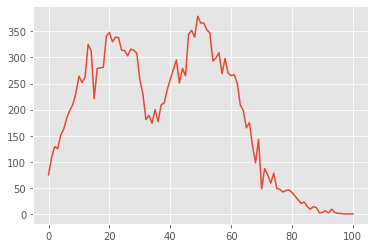

In [7]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')   # 격자 무늬 스타일 지정
plt.plot(male)
plt.show()

* ggplot 스타일 외에도 다양한 스타일 적용 가능
    - matplotlib 라이브러리 임포트한 후
    - print(plt.style.available)

In [8]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


* 우리 동네 남성 연령별 인구수 데이터 시각화

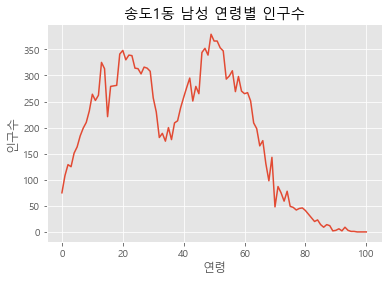

In [9]:
import matplotlib.pyplot as plt

# 한글 제목 넣기
plt.rc('font', family='Malgun Gothic')
plt.title('송도1동 남성 연령별 인구수')

# 격자 무늬 스타일 지정
plt.style.use('ggplot')
plt.plot(male)

# x축, y축 레이블 지정
plt.xlabel('연령')
plt.ylabel('인구수')

plt.show()

### 2. 우리 동네 여성 연령별 인구수 데이터 시각화

In [10]:
import csv

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

female = []
for row in data:
    if '송도1동' in row[0]:
        for i in row[106:207]:
            female.append(int(i))

print(female)
f.close()

[73, 98, 113, 133, 129, 157, 175, 202, 196, 217, 234, 242, 277, 285, 273, 267, 255, 261, 228, 357, 374, 385, 368, 368, 297, 266, 277, 314, 279, 254, 232, 218, 204, 202, 209, 205, 200, 236, 262, 296, 346, 338, 324, 343, 319, 351, 398, 387, 391, 380, 446, 366, 365, 354, 313, 248, 298, 261, 286, 249, 275, 269, 241, 152, 173, 155, 157, 125, 112, 101, 58, 66, 87, 73, 75, 48, 58, 50, 45, 49, 46, 39, 49, 42, 26, 34, 33, 22, 33, 24, 22, 16, 14, 15, 12, 9, 5, 2, 2, 1, 2]


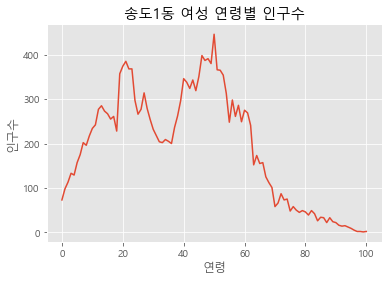

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.title('송도1동 여성 연령별 인구수')

plt.style.use('ggplot')
plt.plot(female)
plt.xlabel('연령')
plt.ylabel('인구수')
plt.show()

### 3. 우리 동네 연령별 인구수 데이터 시각화

* zip 함수

    - 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수
    - row[3:104]: 남성 만 0세 ~ 만 100세 이상 데이터가 담긴 리스트 (길이 101)
    - row[106:207]: 여성 만 0세 ~ 만 100세 이상 데이터가 담긴 리스트 (길이 101)

In [12]:
import csv

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

result = []    # 빈 리스트 만들기

for row in data:
    if '송도1동' in row[0]:                              # 송도 1동이 포함된 행정구역 찾기
        for m, fm in zip(row[3:104], row[106:207]):      # 0세부터 끝(100세 이상)까지 모든 연령에 대해 반복하기
            result.append(int(m)+int(fm))                 # 해당 연령의 인구수 리스트에 순서대로 저장하기

print(result)                                             # 0세부터 100세 이상까지의 인구수 출력하기
f.close()

[148, 206, 242, 258, 280, 320, 359, 401, 406, 449, 498, 494, 539, 610, 586, 488, 534, 541, 509, 698, 722, 715, 707, 706, 611, 579, 580, 630, 593, 562, 489, 448, 385, 391, 383, 405, 377, 445, 475, 534, 604, 615, 619, 594, 598, 616, 742, 739, 730, 759, 812, 732, 718, 701, 606, 547, 607, 530, 584, 519, 540, 536, 492, 361, 371, 320, 332, 256, 210, 244, 106, 153, 162, 132, 153, 97, 105, 92, 90, 95, 87, 73, 76, 62, 49, 48, 42, 36, 45, 26, 25, 22, 16, 24, 15, 10, 6, 2, 2, 1, 2]


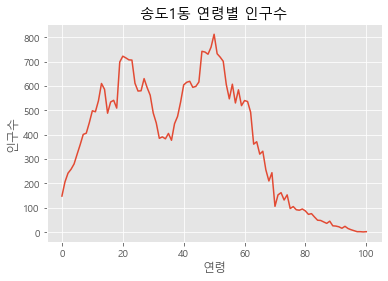

In [13]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.title('송도1동 연령별 인구수')

plt.style.use('ggplot')   # 격자 무늬 스타일 지정
plt.plot(result)
plt.xlabel('연령')
plt.ylabel('인구수')
plt.show()

### '송도1동' 인구 구조 시각화로 알 수 있는 사실들

* 50대가 가장 많이 산다
* 30대는 20대나 50대에 비해 적다
* 70대 이상은 그리 많지 않다

### 만약, 다른 지역에 대해 알아보고 싶다면?

인구 구조를 알고 싶은 동 이름 입력 : 송도2동


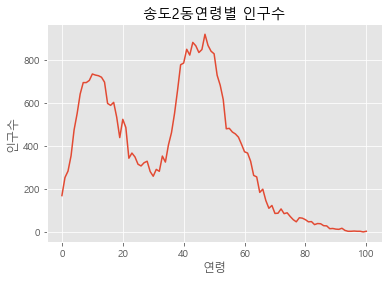

In [15]:
import csv
import matplotlib.pyplot as plt

f = open('incheon_population.csv', 'r')
data = csv.reader(f)

result = []    # 빈 리스트 만들기
name = input('인구 구조를 알고 싶은 동 이름 입력 : ')

for row in data:
    if name in row[0]:
        for m, fm in zip(row[3:104], row[106:207]):
            result.append(int(m)+int(fm))

# print(result)
f.close()

plt.rc('font', family='Malgun Gothic')
plt.title(name + '연령별 인구수')

plt.style.use('ggplot')   # 격자 무늬 스타일 지정
plt.plot(result)
plt.xlabel('연령')
plt.ylabel('인구수')
plt.show()